In [84]:
import numpy as np

In [85]:
import pandas as pd

In [86]:
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv(r"D:\clg data\sem 5\minor\Data set\NSE_NIFTY_05Dec22To20Feb23_1Min_ISO.csv")

In [88]:
df.head()

,time,open,high,low,close,EMA,Smoothing Line,EMA.1,Smoothing Line.1,Volume,Volume MA,EMA.2,Smoothing Line.2,RSI,RSI-based MA,Upper Bollinger Band,Lower Bollinger Band,Histogram,MACD,Signal
0,2022-12-05T09:15:00,18728.60,18728.60,18681.65,18688.90,NaN,NaN,NaN,NaN,5896570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-05T09:16:00,18687.65,18687.65,18676.50,18681.30,NaN,NaN,NaN,NaN,2998282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-05T09:17:00,18680.55,18680.55,18666.80,18667.55,NaN,NaN,NaN,NaN,2556922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-05T09:18:00,18667.90,18668.55,18661.75,18664.40,NaN,NaN,NaN,NaN,1969388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-05T09:19:00,18664.35,18668.85,18663.75,18668.05,NaN,NaN,NaN,NaN,1722055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df1 = df[['time','open','high','low','close','Volume']]

In [90]:
df1

,time,open,high,low,close,Volume
0,2022-12-05T09:15:00,18728.60,18728.60,18681.65,18688.90,5896570
1,2022-12-05T09:16:00,18687.65,18687.65,18676.50,18681.30,2998282
2,2022-12-05T09:17:00,18680.55,18680.55,18666.80,18667.55,2556922
3,2022-12-05T09:18:00,18667.90,18668.55,18661.75,18664.40,1969388
4,2022-12-05T09:19:00,18664.35,18668.85,18663.75,18668.05,1722055
...,...,...,...,...,...,...
20620,2023-02-20T15:25:00,17852.30,17853.70,17850.35,17851.75,558968
20621,2023-02-20T15:26:00,17851.25,17852.15,17848.15,17849.15,693269
20622,2023-02-20T15:27:00,17849.30,17849.55,17844.65,17845.10,514469
20623,2023-02-20T15:28:00,17845.75,17851.20,17844.70,17848.05,772318


In [91]:
close_prices = df1['close'].values

alpha_12 = 2/(12+1)
alpha_26 = 2/(26+1)
alpha_9 = 2/(9+1)

ema_12 = np.zeros_like(close_prices, dtype=float)
ema_26 = np.zeros_like(close_prices, dtype=float)
ema_9 = np.zeros_like(close_prices, dtype=float)
macd = np.zeros_like(close_prices, dtype=float)
macd_h = np.zeros_like(close_prices, dtype=float)


ema_12[0] = close_prices[0]
ema_26[0] = close_prices[0]
ema_9[0] = close_prices[0]

for i in range(1, len(close_prices)):
    ema_12[i] = alpha_12 * close_prices[i] + (1 - alpha_12) * ema_12[i - 1]
    ema_26[i] = alpha_26 * close_prices[i] + (1 - alpha_26) * ema_26[i - 1]
    macd[i] = ema_12[i] - ema_26[i]
    ema_9[i] = alpha_9 * macd[i] + (1 - alpha_9) * ema_9[i - 1]
    macd_h[i] = macd[i] - ema_9[i]

df1['macd'] = macd.tolist()
df1['macd_s'] = ema_9.tolist()
df1['macd_h'] = macd_h.tolist()

C:\Users\joinv\AppData\Local\Temp\ipykernel_28548\2674206990.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['macd'] = macd.tolist()
C:\Users\joinv\AppData\Local\Temp\ipykernel_28548\2674206990.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['macd_s'] = ema_9.tolist()
C:\Users\joinv\AppData\Local\Temp\ipykernel_28548\2674206990.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [92]:
df1.tail(20)

,time,open,high,low,close,Volume,macd,macd_s,macd_h
20605,2023-02-20T15:10:00,17839.80,17842.80,17834.85,17835.65,741947,-2.126661,-0.250901,-1.875759
20606,2023-02-20T15:11:00,17834.85,17838.80,17834.85,17838.35,465598,-2.094511,-0.619623,-1.474888
20607,2023-02-20T15:12:00,17837.80,17839.40,17835.50,17836.95,604258,-2.157135,-0.927126,-1.230009
20608,2023-02-20T15:13:00,17837.20,17842.45,17836.10,17842.35,591810,-1.750847,-1.091870,-0.658977
20609,2023-02-20T15:14:00,17843.00,17847.05,17842.20,17843.85,792201,-1.292920,-1.132080,-0.160840
20610,2023-02-20T15:15:00,17845.65,17851.50,17843.30,17850.20,1127335,-0.412858,-0.988235,0.575378
20611,2023-02-20T15:16:00,17849.55,17850.95,17844.20,17845.05,613034,-0.129472,-0.816483,0.687011
20612,2023-02-20T15:17:00,17844.90,17845.85,17842.50,17842.50,678061,-0.109389,-0.675064,0.565675
20613,2023-02-20T15:18:00,17843.75,17846.10,17837.25,17841.00,1109042,-0.212066,-0.582464,0.370398
20614,2023-02-20T15:19:00,17841.25,17844.25,17840.20,17843.40,705126,-0.098642,-0.485700,0.387058


In [93]:
df_small = df1[-100:]

In [94]:
green_df = df_small[df_small.close > df_small.open].copy()
green_df["Height"] = green_df["close"] - green_df["open"]

red_df = df_small[df_small.close < df_small.open].copy()
red_df["Height"] = red_df["open"] - red_df["close"]

In [95]:
green_df

,time,open,high,low,close,Volume,macd,macd_s,macd_h,Height
20532,2023-02-20T13:57:00,17852.80,17866.80,17851.70,17863.70,492837,-5.459003,-6.032997,0.573994,10.90
20534,2023-02-20T13:59:00,17853.35,17857.15,17850.15,17857.15,379991,-5.383814,-5.833918,0.450104,3.80
20535,2023-02-20T14:00:00,17855.95,17860.75,17852.45,17859.30,278241,-4.981392,-5.663413,0.682021,3.35
20536,2023-02-20T14:01:00,17859.00,17866.20,17857.10,17863.95,313162,-4.238396,-5.378409,1.140014,4.95
20540,2023-02-20T14:05:00,17845.85,17851.30,17843.65,17849.90,268517,-5.467807,-5.225017,-0.242790,4.05
20543,2023-02-20T14:08:00,17844.70,17848.00,17841.95,17848.00,354049,-5.875902,-5.535112,-0.340789,3.30
20544,2023-02-20T14:09:00,17847.40,17849.95,17844.20,17849.10,423608,-5.647112,-5.557512,-0.089600,1.70
20547,2023-02-20T14:12:00,17845.55,17851.10,17842.85,17847.90,416151,-5.344319,-5.535729,0.191410,2.35
20550,2023-02-20T14:15:00,17841.65,17850.80,17839.90,17849.80,415652,-4.774473,-5.294550,0.520076,8.15
20554,2023-02-20T14:19:00,17835.00,17837.05,17831.30,17837.05,415551,-5.800022,-5.397743,-0.402279,2.05


In [96]:
red_df

,time,open,high,low,close,Volume,macd,macd_s,macd_h,Height
20525,2023-02-20T13:50:00,17868.25,17868.25,17861.40,17866.25,403000,-5.895784,-7.132368,1.236583,2.00
20526,2023-02-20T13:51:00,17865.60,17866.00,17861.90,17864.10,329438,-5.579436,-6.821781,1.242345,1.50
20527,2023-02-20T13:52:00,17863.95,17863.95,17858.70,17861.80,296181,-5.451477,-6.547720,1.096243,2.15
20528,2023-02-20T13:53:00,17860.80,17861.40,17856.85,17859.50,232036,-5.472575,-6.332691,0.860116,1.30
20529,2023-02-20T13:54:00,17859.45,17859.45,17854.20,17855.70,243239,-5.729874,-6.212128,0.482254,3.75
20530,2023-02-20T13:55:00,17855.00,17856.70,17851.85,17854.00,258643,-6.001775,-6.170057,0.168282,1.00
20531,2023-02-20T13:56:00,17854.15,17854.45,17849.05,17853.30,448223,-6.202248,-6.176495,-0.025753,0.85
20533,2023-02-20T13:58:00,17863.45,17863.45,17849.75,17853.85,334714,-5.600232,-5.946444,0.346212,9.60
20537,2023-02-20T14:02:00,17864.00,17864.00,17853.20,17855.05,414877,-4.317947,-5.166317,0.848370,8.95
20538,2023-02-20T14:03:00,17855.50,17855.50,17845.30,17848.30,501871,-4.869527,-5.106959,0.237432,7.20


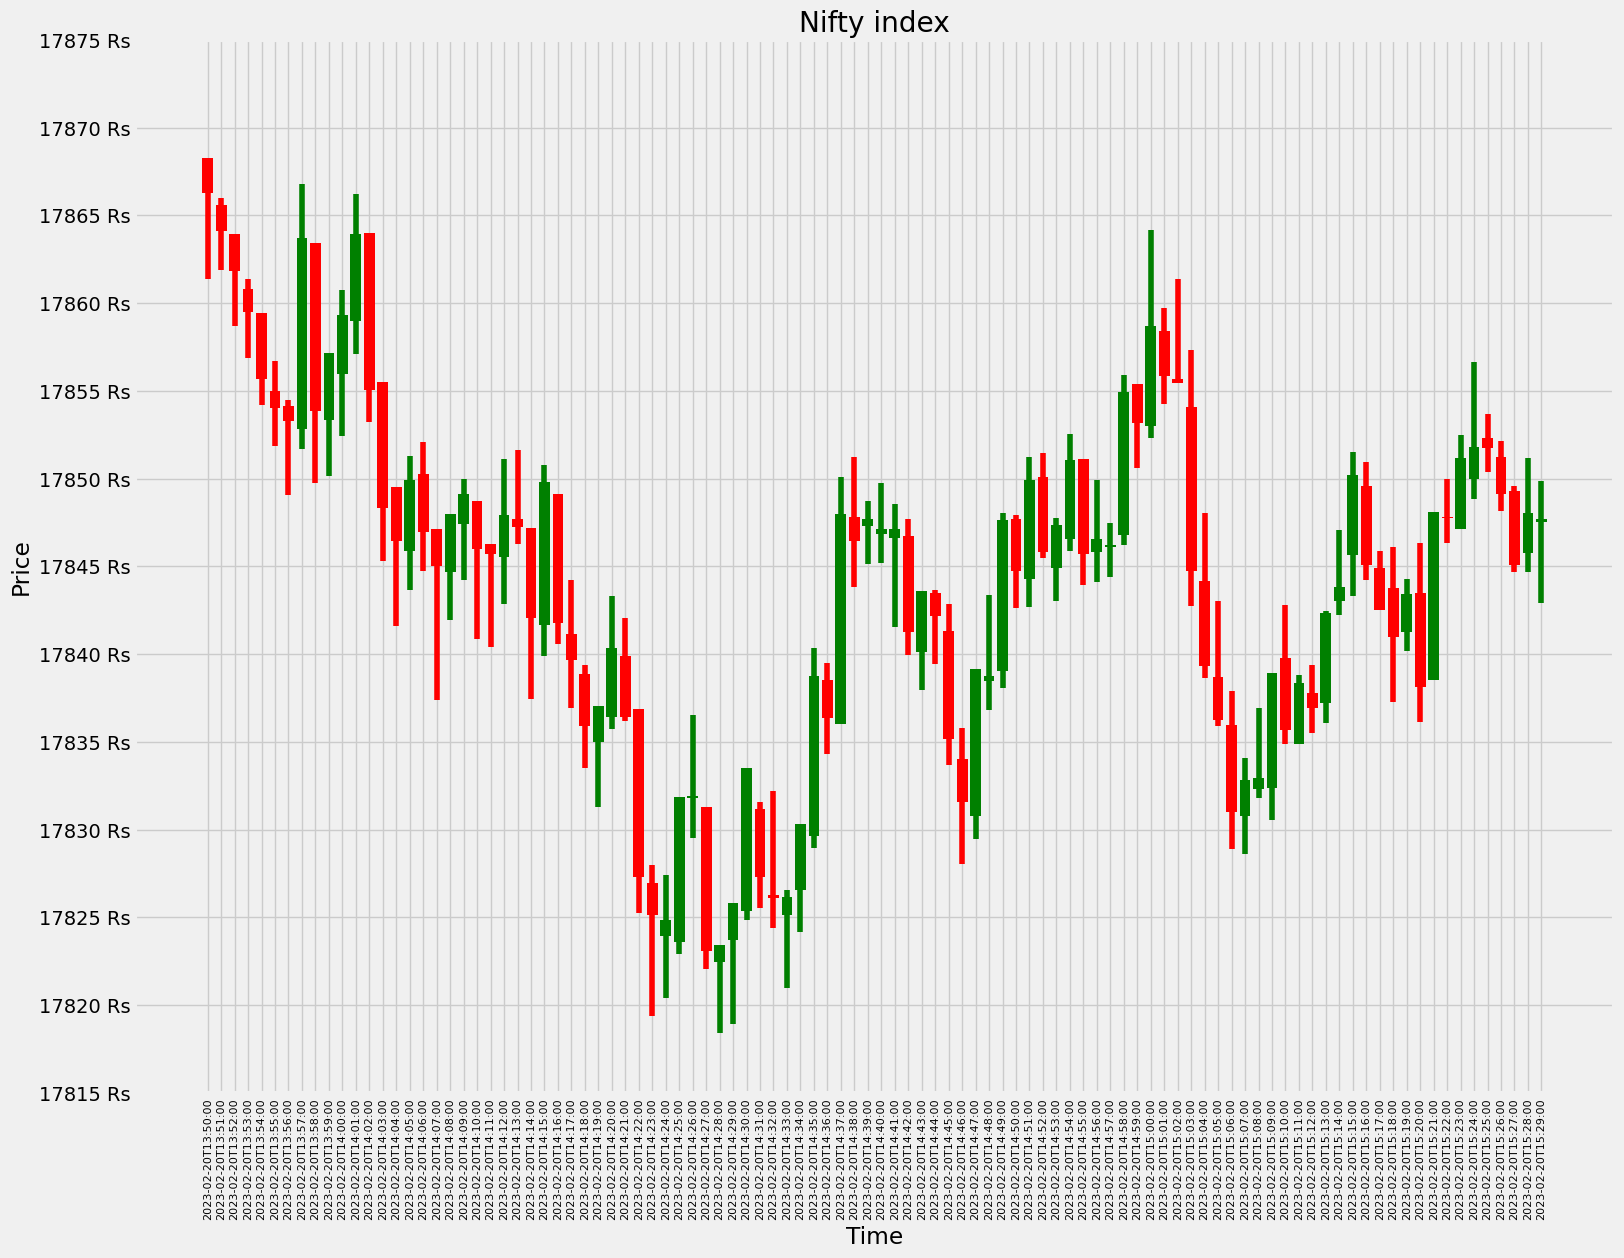

<Figure size 640x480 with 0 Axes>

In [97]:
plt.style.use("fivethirtyeight")
green_df['type'] = 'green'
red_df['type'] = 'red'

combined_df = pd.concat([green_df, red_df])

combined_df_sorted = combined_df.sort_values('time')

fig = plt.figure(figsize=(17, 13))

plt.vlines(x=combined_df_sorted["time"], ymin=combined_df_sorted["low"], ymax=combined_df_sorted["high"], color=combined_df_sorted["type"])

plt.bar(x=combined_df_sorted["time"], height=combined_df_sorted["Height"],
        bottom=combined_df_sorted["open"] * (combined_df_sorted["type"] == 'green') + combined_df_sorted["close"] * (combined_df_sorted["type"] == 'red'),
        color=combined_df_sorted["type"])

plt.yticks(range(17815, 17880, 5), ["{} Rs".format(v) for v in range(17815, 17880, 5)])
plt.xticks(rotation='vertical', fontsize=8)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Nifty index")

plt.show()
plt.savefig('plot1.png')

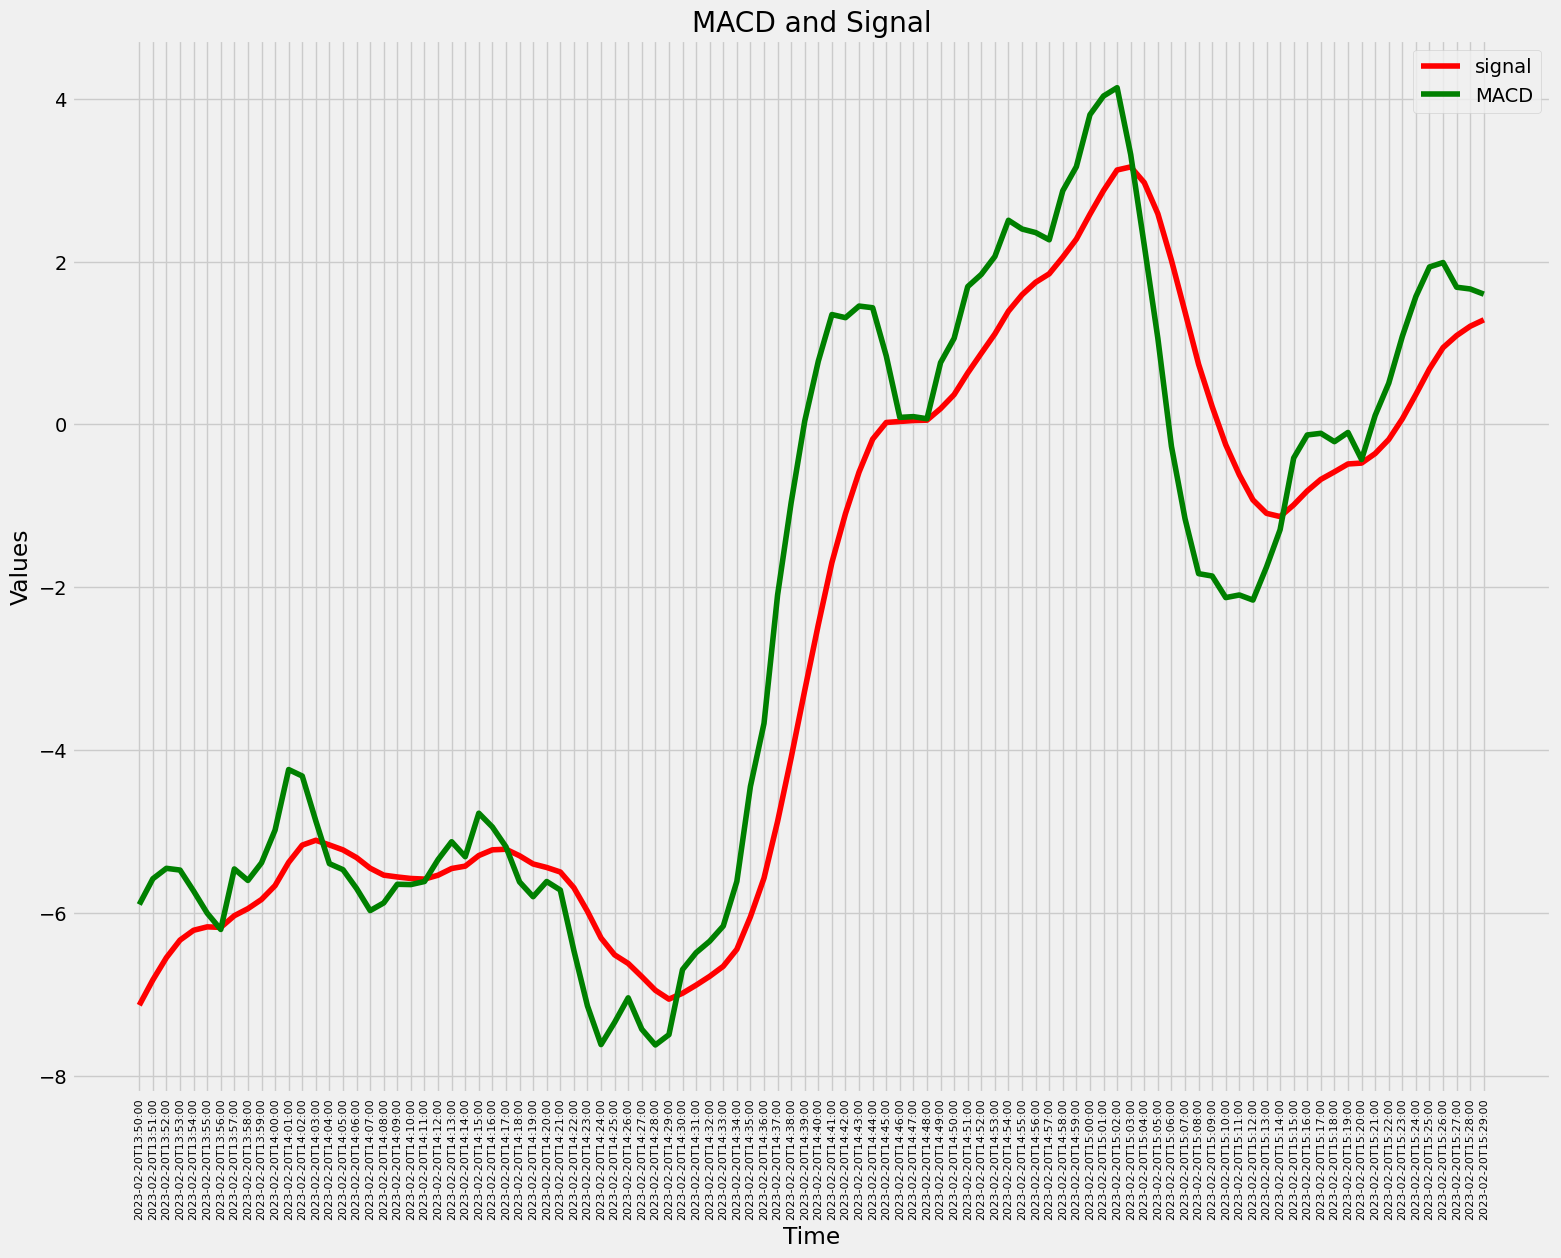

In [98]:
fig = plt.figure(figsize=(17, 13))
plt.plot(df_small.time, df_small.macd_s, label='signal', color='red')
plt.plot(df_small.time, df_small.macd, label='MACD', color='green')

plt.legend()

plt.xticks(rotation='vertical', fontsize=8)  # Set x-axis ticks in vertical format

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('MACD and Signal')

# Save the figure before displaying it
plt.savefig('macd_signal_plot.png')  # Save the figure as a PNG file (or choose your preferred format)

plt.show()

C:\Users\joinv\AppData\Local\Temp\ipykernel_28548\543058136.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1[["close","Volume"]].plot(subplots=True, layout=(2,1), ax=ax);


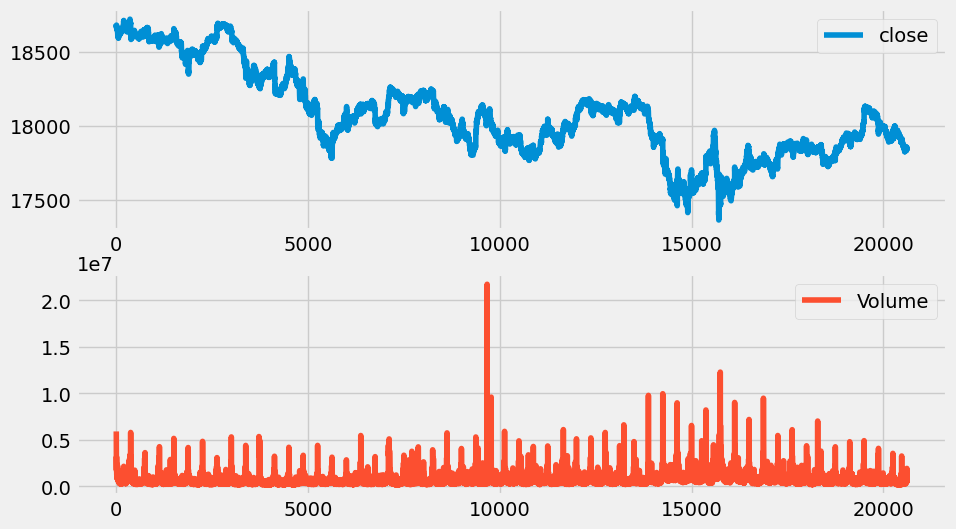

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))

df1[["close","Volume"]].plot(subplots=True, layout=(2,1), ax=ax);

In [100]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

<Figure size 640x480 with 0 Axes>

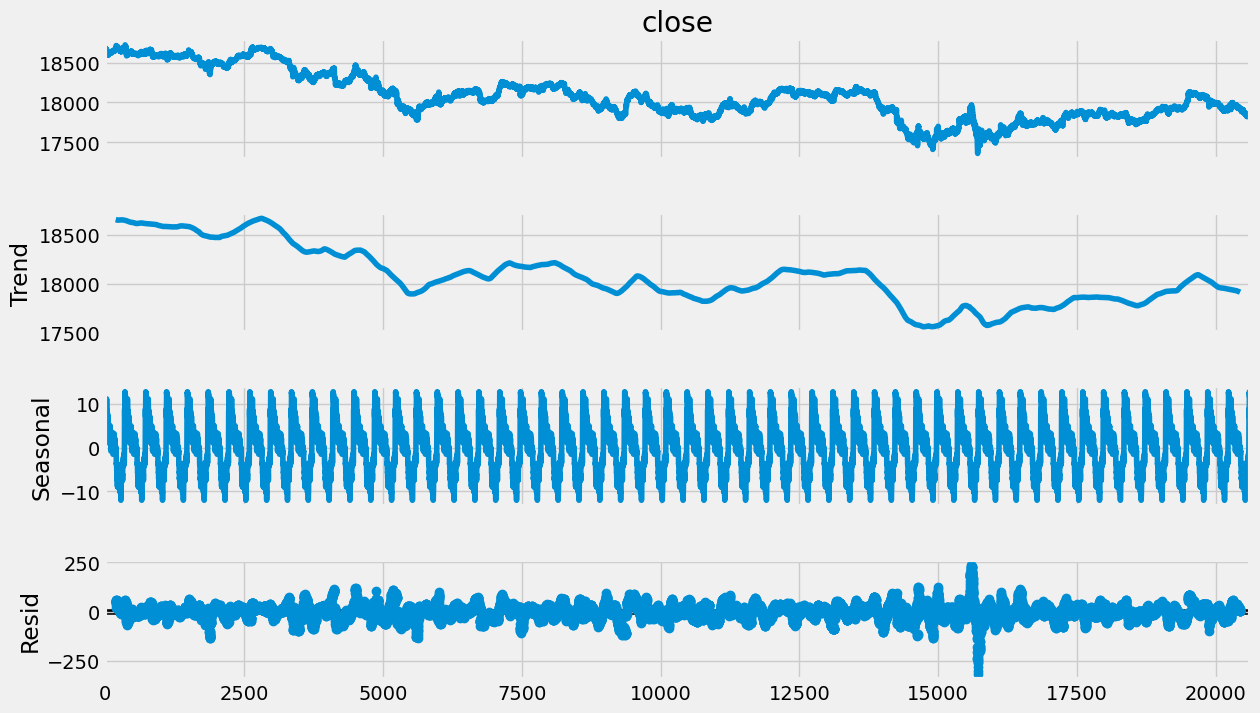

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['close'], period=375)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [102]:
import math

In [103]:
def split_every_n_rows(df, chunk_size=375):
    chunks = []

    num_chunks = math.ceil(int(df1.shape[0] / chunk_size))

    for index in range(0, df.shape[0], num_chunks):
        chunks.append(
            df1.iloc[index:index + chunk_size]
        )

    return chunks


dfc = split_every_n_rows(df, 375)

print(dfc)

[                    time      open      high       low     close   Volume  \
0    2022-12-05T09:15:00  18728.60  18728.60  18681.65  18688.90  5896570   
1    2022-12-05T09:16:00  18687.65  18687.65  18676.50  18681.30  2998282   
2    2022-12-05T09:17:00  18680.55  18680.55  18666.80  18667.55  2556922   
3    2022-12-05T09:18:00  18667.90  18668.55  18661.75  18664.40  1969388   
4    2022-12-05T09:19:00  18664.35  18668.85  18663.75  18668.05  1722055   
..                   ...       ...       ...       ...       ...      ...   
370  2022-12-05T15:25:00  18692.55  18692.80  18690.30  18691.60  1659846   
371  2022-12-05T15:26:00  18691.30  18694.50  18689.25  18693.05  1202633   
372  2022-12-05T15:27:00  18693.10  18695.90  18692.15  18695.40  1274999   
373  2022-12-05T15:28:00  18694.95  18694.95  18685.90  18690.75  1320912   
374  2022-12-05T15:29:00  18689.50  18694.05  18688.10  18694.05   786291   

         macd        macd_s        macd_h  
0    0.000000  18688.900000   

In [104]:
def split_every_n_rows(df, chunk_size=162):
    chunks = []

    num_chunks = math.ceil(int(df1.shape[0] / chunk_size))

    for index in range(0, df.shape[0], num_chunks):
        chunks.append(
            df1.iloc[index:index + chunk_size]
        )

    return chunks


dfc_half = split_every_n_rows(df, 162)

print(dfc_half)

[                    time      open      high       low     close   Volume  \
0    2022-12-05T09:15:00  18728.60  18728.60  18681.65  18688.90  5896570   
1    2022-12-05T09:16:00  18687.65  18687.65  18676.50  18681.30  2998282   
2    2022-12-05T09:17:00  18680.55  18680.55  18666.80  18667.55  2556922   
3    2022-12-05T09:18:00  18667.90  18668.55  18661.75  18664.40  1969388   
4    2022-12-05T09:19:00  18664.35  18668.85  18663.75  18668.05  1722055   
..                   ...       ...       ...       ...       ...      ...   
157  2022-12-05T11:52:00  18640.60  18640.90  18638.00  18638.65   523549   
158  2022-12-05T11:53:00  18639.40  18642.45  18639.15  18640.90   760454   
159  2022-12-05T11:54:00  18640.95  18642.30  18640.00  18640.70   379176   
160  2022-12-05T11:55:00  18640.20  18642.50  18640.20  18641.35   383577   
161  2022-12-05T11:56:00  18641.10  18646.50  18641.10  18645.35   604326   

         macd        macd_s        macd_h  
0    0.000000  18688.900000   

In [105]:
df1['chunk_index'] = (df1.index // 375) + 1

C:\Users\joinv\AppData\Local\Temp\ipykernel_28548\3087982969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['chunk_index'] = (df1.index // 375) + 1


In [106]:
df1

,time,open,high,low,close,Volume,macd,macd_s,macd_h,chunk_index
0,2022-12-05T09:15:00,18728.60,18728.60,18681.65,18688.90,5896570,0.000000,18688.900000,0.000000,1
1,2022-12-05T09:16:00,18687.65,18687.65,18676.50,18681.30,2998282,-0.606268,14950.998746,-14951.605014,1
2,2022-12-05T09:17:00,18680.55,18680.55,18666.80,18667.55,2556922,-2.171221,11960.364753,-11962.535974,1
3,2022-12-05T09:18:00,18667.90,18668.55,18661.75,18664.40,1969388,-3.623863,9567.567030,-9571.190893,1
4,2022-12-05T09:19:00,18664.35,18668.85,18663.75,18668.05,1722055,-4.429507,7653.167723,-7657.597229,1
...,...,...,...,...,...,...,...,...,...,...
20620,2023-02-20T15:25:00,17852.30,17853.70,17850.35,17851.75,558968,1.933455,0.681719,1.251736,55
20621,2023-02-20T15:26:00,17851.25,17852.15,17848.15,17849.15,693269,1.987770,0.942929,1.044840,55
20622,2023-02-20T15:27:00,17849.30,17849.55,17844.65,17845.10,514469,1.684594,1.091262,0.593332,55
20623,2023-02-20T15:28:00,17845.75,17851.20,17844.70,17848.05,772318,1.663194,1.205649,0.457545,55


In [107]:
result = df1.groupby('chunk_index').tail(1)

In [108]:
daily=result[['close']]

In [109]:
daily.reset_index(drop=True, inplace=True)
daily

,close
0,18694.05
1,18647.80
2,18551.55
3,18614.40
4,18493.25
5,18494.70
6,18594.35
7,18643.00
8,18399.75
9,18270.10


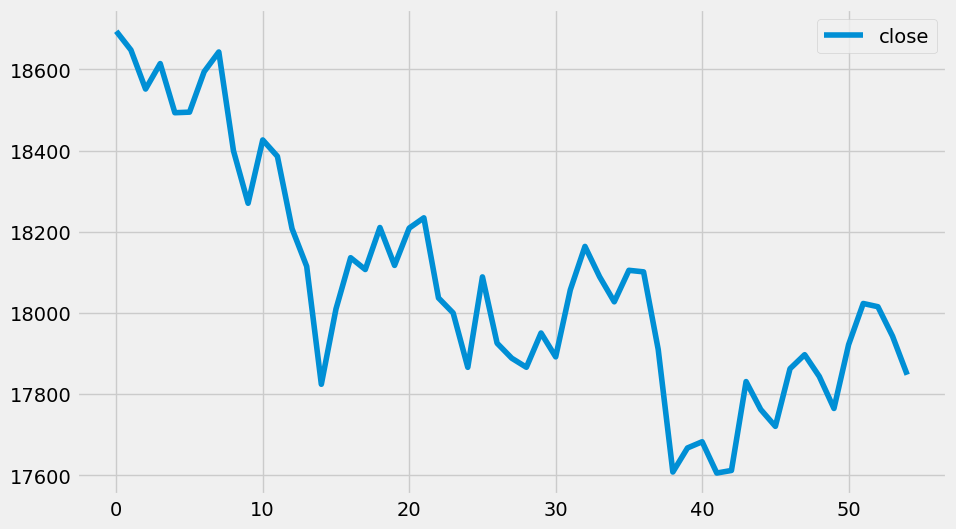

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))

daily[["close"]].plot(ax=ax);

In [111]:
from statsmodels.tsa.stattools import adfuller

adf_check(daily.close)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.293862340380281
p-value : 0.17395513072463464
#Lags Used : 0
Number of Observations Used : 54
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [112]:
from statsmodels.graphics.tsaplots import plot_acf

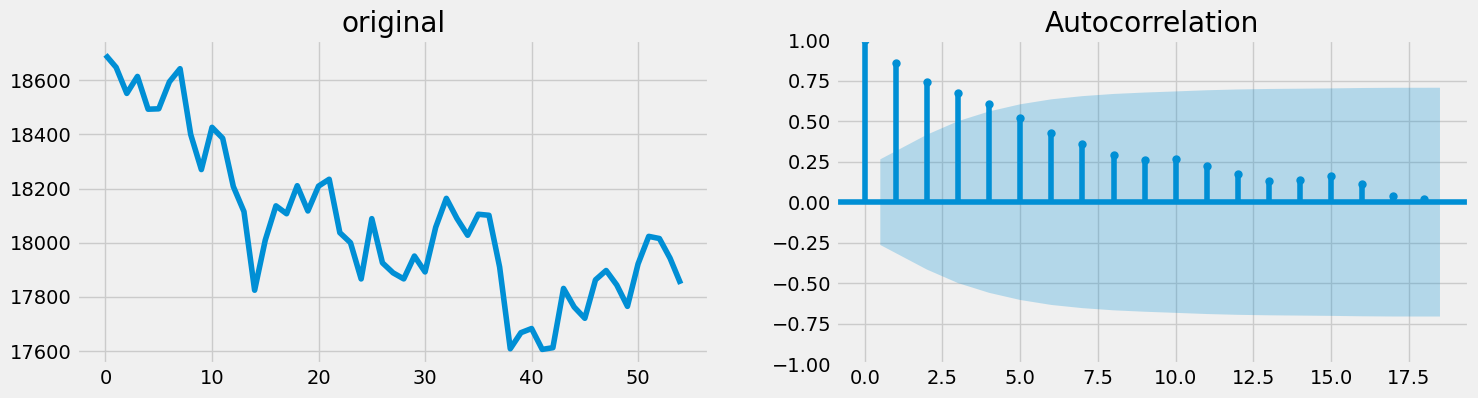

In [113]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(daily.close)
ax1.set_title("original")

plot_acf(daily.close,ax=ax2);


Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.517613635812187
p-value : 3.865828639604767e-11
#Lags Used : 0
Number of Observations Used : 53
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


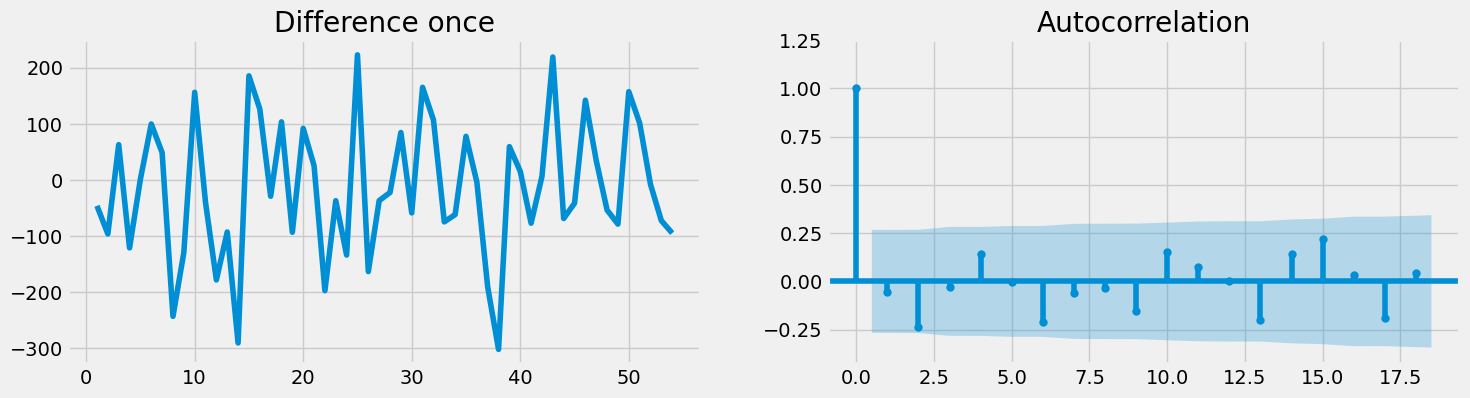

In [114]:
diff = daily.close.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")

plot_acf(diff,ax=ax2,auto_ylims=True);

adf_check(diff)

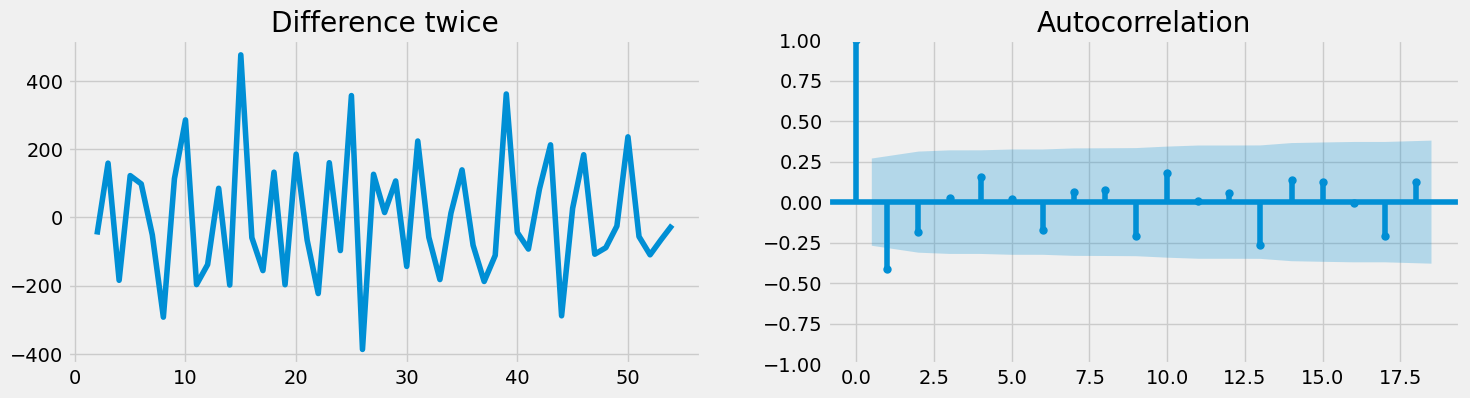

In [115]:
diff = daily.close.diff().diff().dropna()
 
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff,ax=ax2);

In [116]:
from pmdarima.arima.utils import ndiffs

In [117]:
ndiffs(daily.close, test = "adf")

1

# P= order of AR term

In [118]:
from statsmodels.graphics.tsaplots import plot_pacf

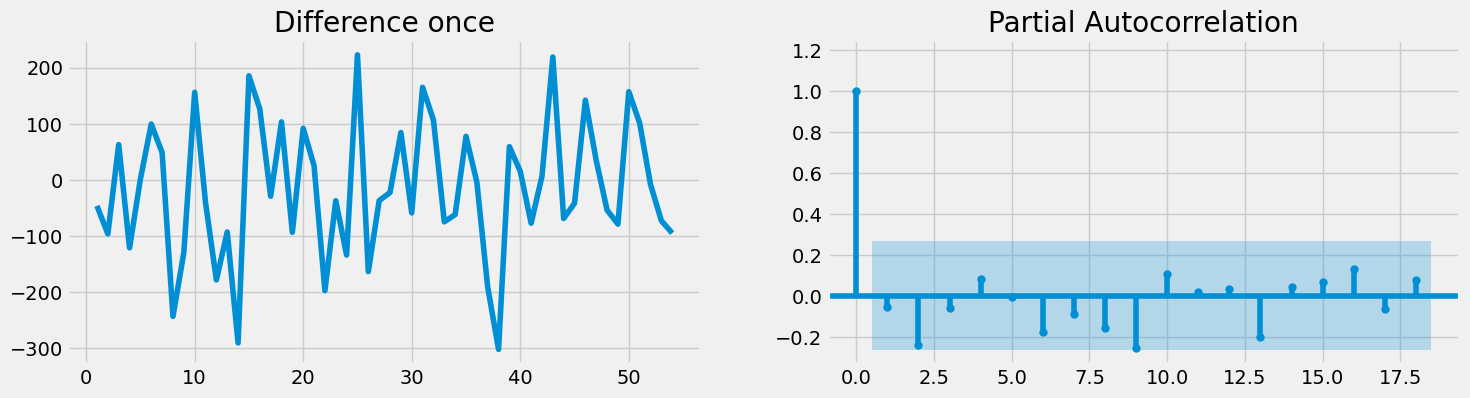

In [119]:
diff = daily.close.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2,auto_ylims=True);

P=2

# Q = Order of moving avg

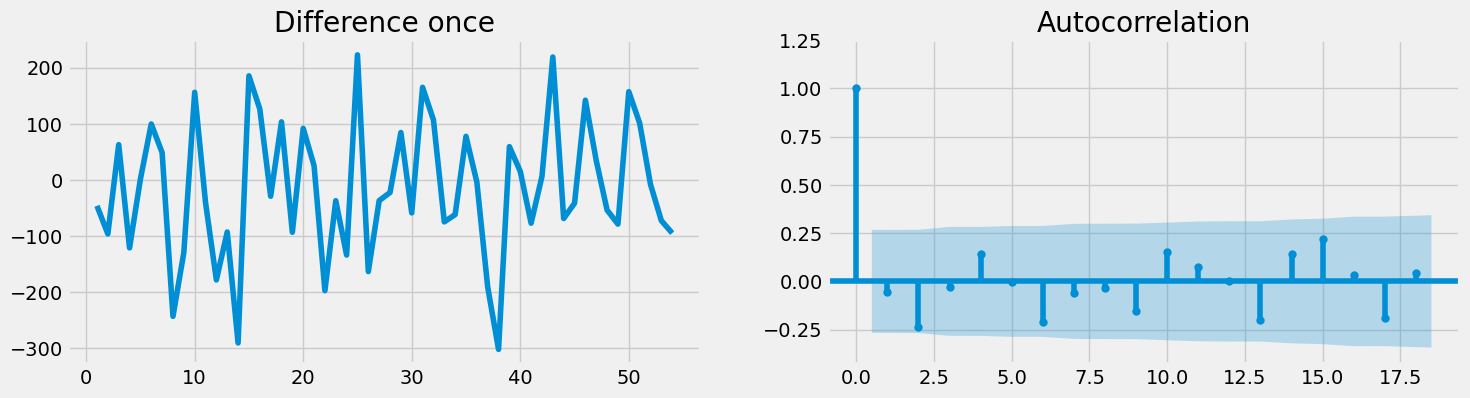

In [120]:
diff = daily.close.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2,auto_ylims=True);

Q= 2

In [121]:
from statsmodels.tsa.arima.model import ARIMA

In [122]:
import itertools
p=d=q=range(0,4)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(daily.close,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 782.4222134937755
(0, 0, 1) 738.4445053883255
(0, 0, 2) 719.9976858912571
(0, 0, 3) 714.5609610413679
(0, 1, 0) 675.29798019205
(0, 1, 1) 677.0151383961773
(0, 1, 2) 676.0026459799112
(0, 1, 3) 678.0021452880226
(0, 2, 0) 702.266802793272
(0, 2, 1) 672.5813792270668


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 2, 2) 674.4732150312134
(0, 2, 3) 673.6737582005331
(0, 3, 0) 744.0805287039195
(0, 3, 1) 704.9757411297917
(0, 3, 2) 686.8360284736483
(0, 3, 3) 686.573818452365
(1, 0, 0) 692.1764207972648
(1, 0, 1) 694.1764028304796
(1, 0, 2) 694.5680771663854
(1, 0, 3) 696.5641211058373
(1, 1, 0) 677.14765782653
(1, 1, 1) 677.1926519623663
(1, 1, 2) 678.0022889183541
(1, 1, 3) 679.7489544480574
(1, 2, 0) 696.4850928379606


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 2, 1) 674.5200088267633


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 2, 2) 674.0904900068778
(1, 2, 3) 675.4044050077988
(1, 3, 0) 732.2876310811554


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 3, 1) 703.2909066549572
(1, 3, 2) 708.6958481865892


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 3, 3) 687.6251789440876
(2, 0, 0) 694.1764122002021
(2, 0, 1) 695.823935605251
(2, 0, 2) 696.5384559174435


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 3) 697.4188627740514
(2, 1, 0) 675.7587865527639
(2, 1, 1) 677.739522965722
(2, 1, 2) 674.4715244610906


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 3) 676.4207285652161
(2, 2, 0) 687.5085923285567
(2, 2, 1) 673.3867337113819
(2, 2, 2) 675.3749023394709
(2, 2, 3) 674.9767487360958
(2, 3, 0) 720.3691580175533
(2, 3, 1) 695.687609721972


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 3, 2) 685.9287480387331


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 3) 688.3429270136904
(3, 0, 0) 694.13297290248


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 1) 695.968235704598


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 2) 694.4854389042949


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 3) 694.9753665941589
(3, 1, 0) 677.7316332300404
(3, 1, 1) 679.7075420151643
(3, 1, 2) 679.1939103294966


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 3) 679.1623252211896
(3, 2, 0) 683.1401293331634
(3, 2, 1) 675.3689297196213
(3, 2, 2) 676.8949597724652
(3, 2, 3) 676.8931064287567
(3, 3, 0) 711.4636455296979
(3, 3, 1) 692.0238539576407


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(3, 3, 2) 688.4235403832315
(3, 3, 3) 690.3866617685708


C:\Users\joinv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [123]:
model = ARIMA(daily.close, order=(2,1,2))
result=model.fit()

In [124]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   55
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -332.236
Date:                Thu, 29 Feb 2024   AIC                            674.472
Time:                        22:33:48   BIC                            684.416
Sample:                             0   HQIC                           678.307
                                 - 55                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6154      0.071      8.725      0.000       0.477       0.754
ar.L2         -0.9542      0.052    -18.465      0.000      -1.055      -0.853
ma.L1         -0.7630      3.014     -0.253      0.8

In [125]:
res = result.predict(
start=1,
end=60,
dynamic=False)
res

1     18677.655183
2     18598.215587
3     18544.513759
4     18658.121584
5     18531.794608
6     18498.407880
7     18554.408244
8     18598.462985
9     18423.939279
10    18357.578757
11    18459.568295
12    18326.769521
13    18156.118468
14    18150.118134
15    17934.216303
16    18047.918130
17    18041.111962
18    18001.215116
19    18209.065597
20    18221.947980
21    18278.621294
22    18182.830514
23    17957.643236
24    17997.595132
25    17955.842313
26    18131.628053
27    17890.094626
28    17828.559232
29    17858.101214
30    17990.591861
31    17935.911756
32    18030.762522
33    18087.743657
34    18066.520651
35    18091.095925
36    18163.948250
37    18084.778445
38    17866.577694
39    17630.484016
40    17716.850858
41    17696.212542
42    17578.325907
43    17577.071600
44    17801.625745
45    17784.336041
46    17770.230026
47    17858.942048
48    17843.151972
49    17813.890051
50    17804.534429
51    17958.178511
52    17999.957927
53    17965.

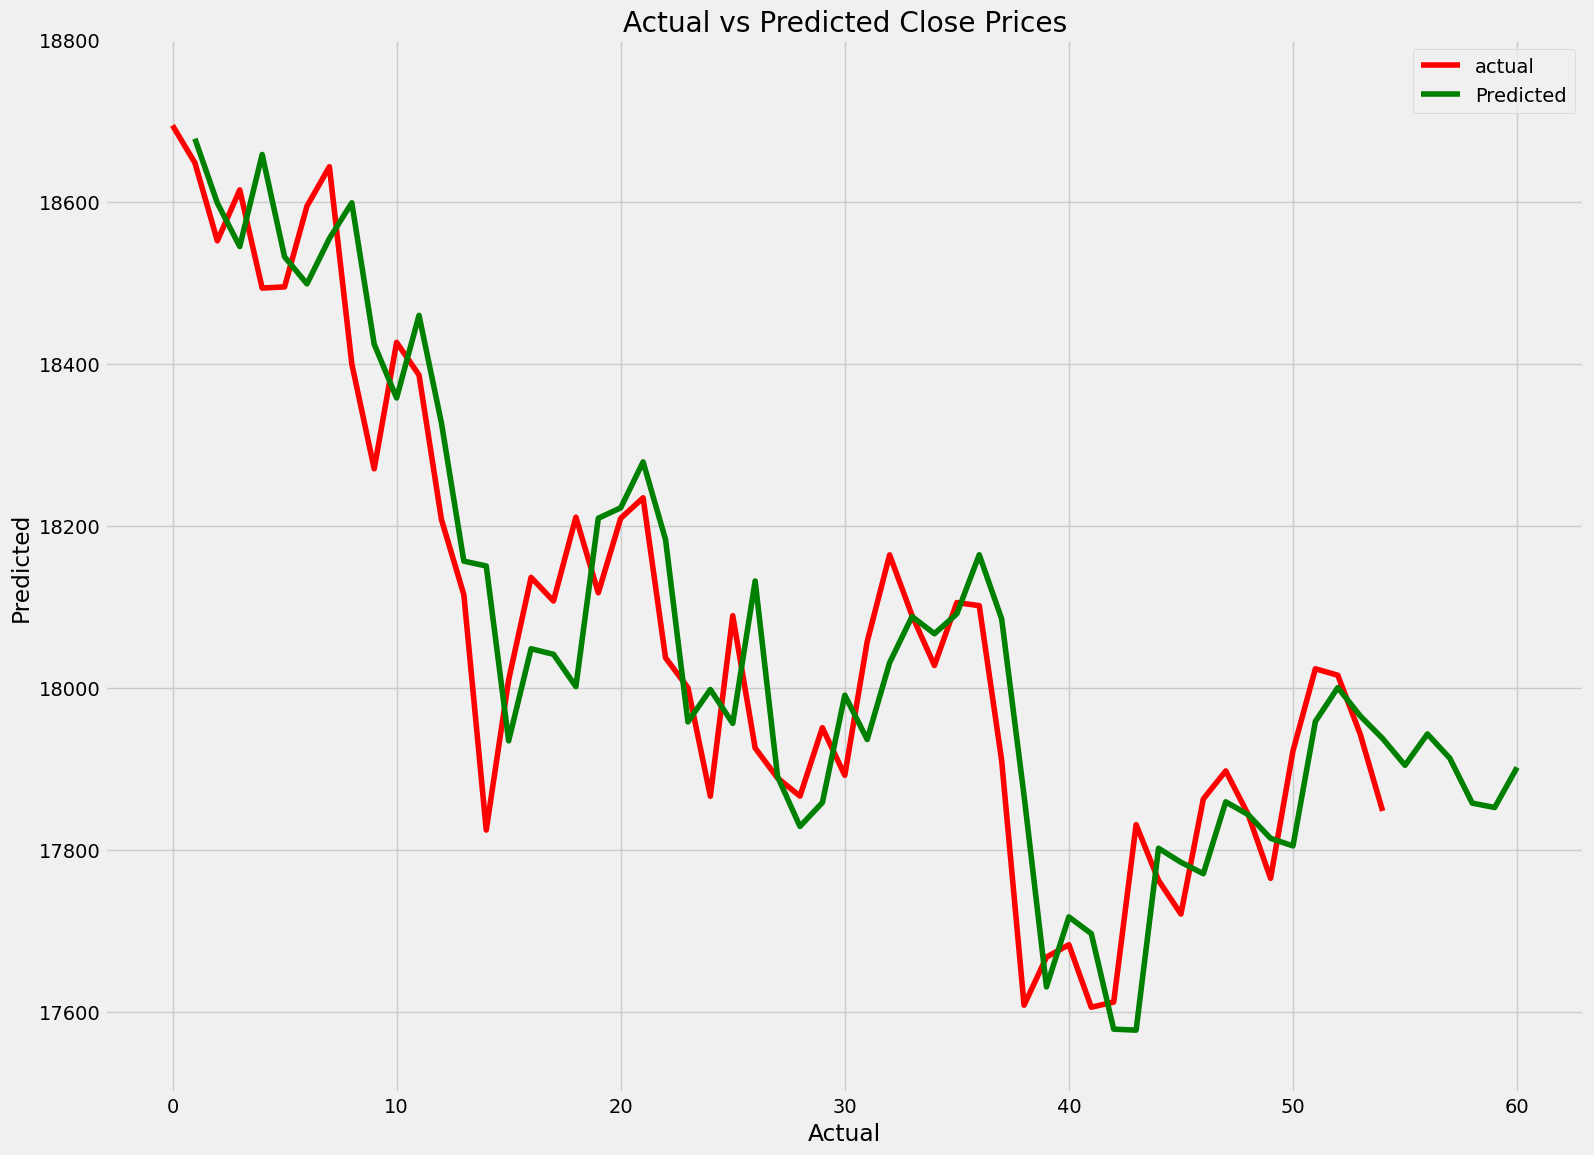

In [126]:
fig,ax = plt.subplots(figsize=(17,13)) 

plt.plot(daily.close, label='actual', color ='red')
plt.plot(res, label='Predicted', color ='green')

plt.ylim([17500,18800])
#plt.yticks(range(17500,18800,130));

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted Close Prices')
ax.legend()
plt.savefig('plot.png')

In [127]:
rrr = 0.32

capital = 500

daily['Loss'] = daily['close']-(rrr*capital)
daily['Profit'] = daily['close']+(rrr*capital)

daily


,close,Loss,Profit
0,18694.05,18534.05,18854.05
1,18647.80,18487.80,18807.80
2,18551.55,18391.55,18711.55
3,18614.40,18454.40,18774.40
4,18493.25,18333.25,18653.25
5,18494.70,18334.70,18654.70
6,18594.35,18434.35,18754.35
7,18643.00,18483.00,18803.00
8,18399.75,18239.75,18559.75
9,18270.10,18110.10,18430.10


In [128]:
# Print entry, exit, and stop-loss points for each observation
for index, row in daily.iterrows():
    print(f"Observation at index {index}:")
    print(f"Closing Price: {row['close']}")
    print(f"Stop Loss: {row['Loss']}")
    print(f"Take Profit: {row['Profit']}")

Observation at index 0:
Closing Price: 18694.05
Stop Loss: 18534.05
Take Profit: 18854.05
Observation at index 1:
Closing Price: 18647.8
Stop Loss: 18487.8
Take Profit: 18807.8
Observation at index 2:
Closing Price: 18551.55
Stop Loss: 18391.55
Take Profit: 18711.55
Observation at index 3:
Closing Price: 18614.4
Stop Loss: 18454.4
Take Profit: 18774.4
Observation at index 4:
Closing Price: 18493.25
Stop Loss: 18333.25
Take Profit: 18653.25
Observation at index 5:
Closing Price: 18494.7
Stop Loss: 18334.7
Take Profit: 18654.7
Observation at index 6:
Closing Price: 18594.35
Stop Loss: 18434.35
Take Profit: 18754.35
Observation at index 7:
Closing Price: 18643.0
Stop Loss: 18483.0
Take Profit: 18803.0
Observation at index 8:
Closing Price: 18399.75
Stop Loss: 18239.75
Take Profit: 18559.75
Observation at index 9:
Closing Price: 18270.1
Stop Loss: 18110.1
Take Profit: 18430.1
Observation at index 10:
Closing Price: 18426.2
Stop Loss: 18266.2
Take Profit: 18586.2
Observation at index 11:
Cl

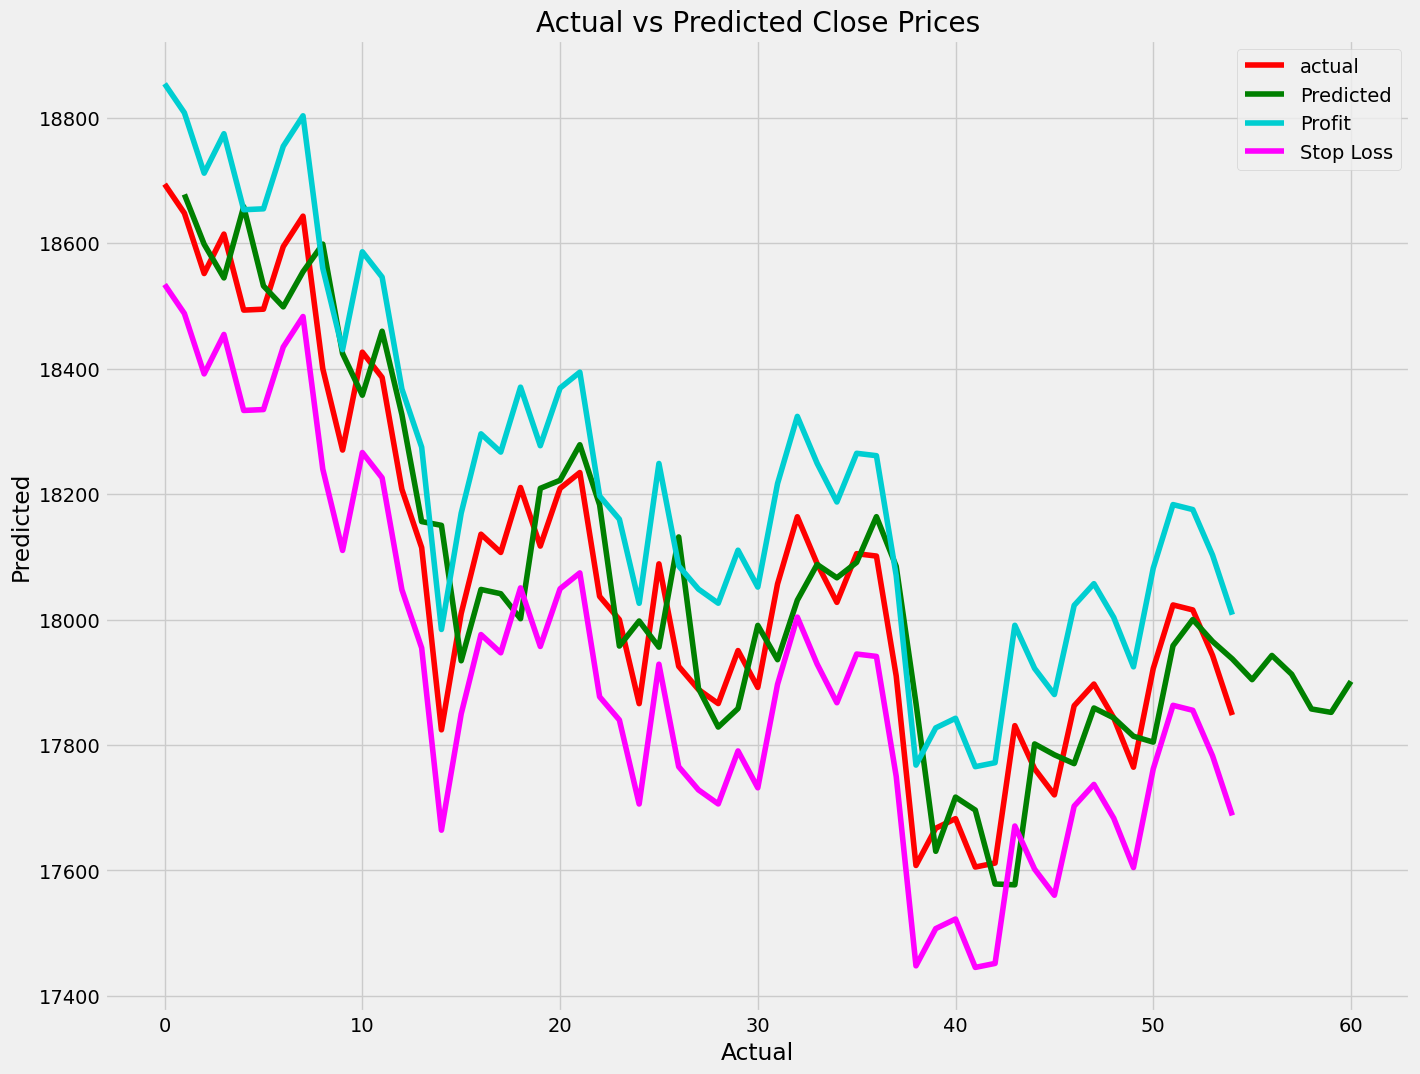

In [129]:
fig,ax = plt.subplots(figsize=(15,12)) 

plt.plot(daily.close, label='actual', color ='red')
plt.plot(res, label='Predicted', color ='green')
plt.plot(daily.Profit, label='Profit', color ='darkturquoise')
plt.plot(daily.Loss, label='Stop Loss', color ='magenta')

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted Close Prices')
ax.legend()
plt.savefig('plot.png')

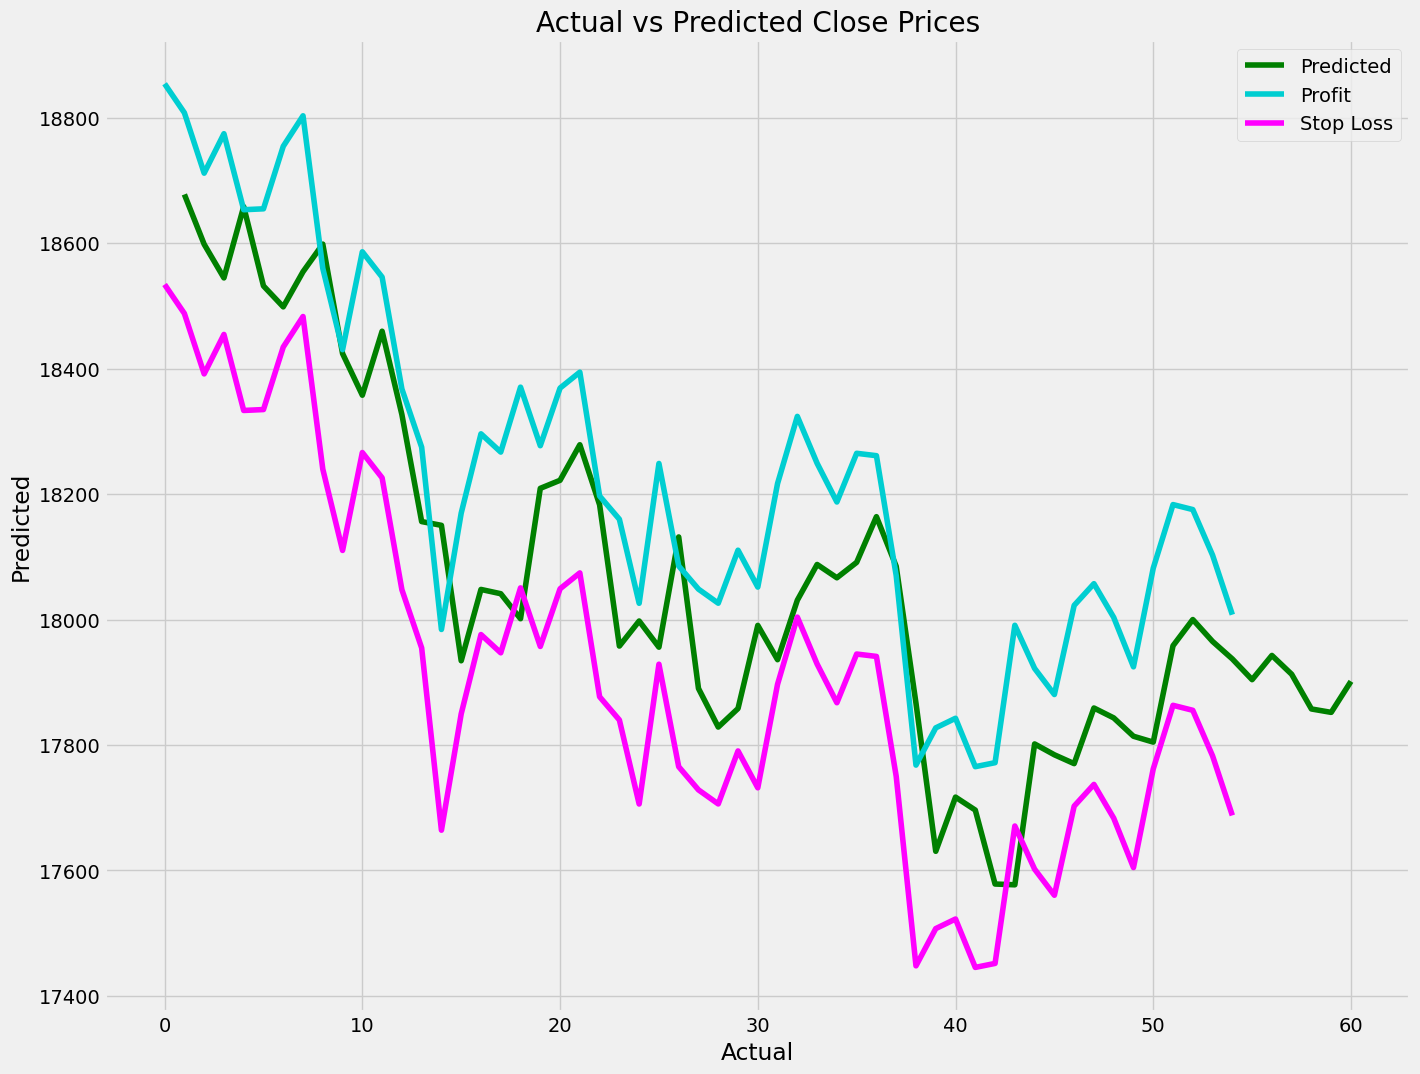

In [130]:
fig,ax = plt.subplots(figsize=(15,12)) 

plt.plot(res, label='Predicted', color ='green')
plt.plot(daily.Profit, label='Profit', color ='darkturquoise')
plt.plot(daily.Loss, label='Stop Loss', color ='magenta')

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted Close Prices')
ax.legend()
plt.savefig('plot.png')

In [131]:
closing_values = [18677.655183, 18598.215587, 18544.513759, 18658.121584, 18531.794608, 18498.407880, 18554.408244, 18598.462985, 18423.939279, 18357.578757, 18459.568295, 18326.769521, 18156.118468, 18150.118134, 17934.216303, 18047.918130, 18041.111962, 18001.215116, 18209.065597, 18221.947980, 18278.621294, 18182.830514, 17957.643236, 17997.595132, 17955.842313, 18131.628053, 17890.094626, 17828.559232, 17858.101214, 17990.591861, 17935.911756, 18030.762522, 18087.743657, 18066.520651, 18091.095925, 18163.948250, 18084.778445, 17866.577694, 17630.484016, 17716.850858, 17696.212542, 17578.325907, 17577.071600, 17801.625745, 17784.336041, 17770.230026, 17858.942048, 17843.151972, 17813.890051, 17804.534429, 17958.178511, 17999.957927, 17965.041895, 17937.121384, 17904.080504, 17942.728056, 17912.716594, 17857.371362, 17851.946683]

investment = [1000] * len(closing_values)
ratios = []

# Calculate ratios
for i in range(1, len(closing_values)):
    ratio = closing_values[i] / closing_values[i - 1]
    ratios.append(ratio)
    investment[i] = investment[i - 1] * ratio
    
print(investment)

[1000, 995.7468110840645, 992.8716199814428, 998.954172844042, 992.1906377663101, 990.4031153137921, 993.4013698297534, 995.7600567510162, 986.4160730287529, 982.8631365734103, 988.3236473816852, 981.2136128137018, 972.0769705891832, 971.7557132396279, 960.1963483790694, 966.2839341004014, 965.9195324700407, 963.7834588778742, 974.9117551743591, 975.6014768162773, 978.6357610154836, 973.507131160105, 961.4506242916754, 963.5896452559538, 961.3542030341699, 970.76575594473, 957.83407771031, 954.5394781796361, 956.1211532727115, 963.214690748475, 960.2871227821402, 965.365424371428, 968.4161892796411, 967.2799114229155, 968.5956694106937, 972.4961764222113, 968.2574320924595, 956.5749832592354, 943.9345487032484, 948.5586217549136, 947.4536481488699, 941.1420081788109, 941.0748526934082, 953.0974616772374, 952.1717724603309, 951.4165376697863, 956.166171450409, 955.3207721834617, 953.754091531458, 953.2531923603183, 961.479282867645, 963.7161490904474, 961.8467478375652, 960.35188615785,

In [132]:
# Initialize stop loss and take profit
risk_to_return_ratio = 0.3
stop_loss = investment[0]*(1-risk_to_return_ratio*0.1)
print("Risk to reward ratio Entered by user ",risk_to_return_ratio)
print("Amount to be invested by the User: ",investment[0])
print("Stop loss amount = ",stop_loss)
#stop_loss = 970
take_profit = investment[0] * (1 +  0.1)
print("target amount = ",take_profit)
#take_profit = 1100

# Find the day when stop loss or take profit is reached first
stop_loss_reached = False
take_profit_reached = False
day_stop_loss = 0
day_take_profit = 0

for i in range(len(closing_values)):
    if investment[i] <= stop_loss:
        stop_loss_reached = True
        day_stop_loss = i + 1
        break
    elif investment[i] >= take_profit:
        take_profit_reached = True
        day_take_profit = i + 1
        break

if stop_loss_reached and take_profit_reached:
    if day_stop_loss < day_take_profit:
        print(f"Stop Loss reached on day {day_stop_loss}, and so the exit point will be on day {day_stop_loss}" )
        print("The amount will be :",investment[i])
    else:
        print(f"Take Profit reached on day {day_take_profit}, and so the exit point will be on day {day_stop_loss}" )
        print("The amount will be :",investment[i])
elif stop_loss_reached:
    print(f"Stop Loss reached on day {day_stop_loss}, and so the exit point will be on day {day_stop_loss}" )
    print("The amount will be :",investment[i])
elif take_profit_reached:
    print(f"Take Profit reached on day {day_take_profit}, and  so the exit point will be on day {day_stop_loss}" )
    print("The amount will be :",investment[i])
else:
    print("Neither Stop Loss nor Take Profit reached within the provided data.")
    

Risk to reward ratio Entered by user  0.3
Amount to be invested by the User:  1000
Stop loss amount =  970.0
target amount =  1100.0
Stop Loss reached on day 15, and so the exit point will be on day 15
The amount will be : 960.1963483790694


In [188]:
def generate_directional_changes(data, threshold_percentage):
    # Initialize variables
    event = "Upturn"  # Initial event is Upturn event
    ph = pl = data[0]  # Initial prices
    t_dc_0 = t_dc_1 = t_os_0 = t_os_1 = 0  # Initial time variables
    delta_xdc = 0.01  # Fixed value, can be adjusted

    # Lists to store events and their corresponding times
    events = []
    times = []

    # Iterate through the data
    for t, price in enumerate(data):
        if event == "Upturn":
            if price <= ph * (1 - delta_xdc):
                event = "Downturn"
                pl = price
                t_dc_1 = t
                t_os_0 = t + 1
            else:
                if ph < price:
                    ph = price
                    t_dc_0 = t
                    t_os_1 = t - 1
        else:
            if price >= pl * (1 + delta_xdc):
                event = "Upturn"
                ph = price
                t_dc_1 = t
                t_os_0 = t + 1
            else:
                if pl > price:
                    pl = price
                    t_dc_0 = t
                    t_os_1 = t - 1

        # Save event and time information
        events.append(event)
        times.append(t)
        
    return events, times

# Example usage
threshold_percentage = 0.01
events, times = generate_directional_changes(investment, threshold_percentage)

# Print the generated events and their corresponding times
for event, time in zip(events, times):
    print(f"Event: {event}, Time: {time}")

Event: Upturn, Time: 0
Event: Upturn, Time: 1
Event: Upturn, Time: 2
Event: Upturn, Time: 3
Event: Upturn, Time: 4
Event: Upturn, Time: 5
Event: Upturn, Time: 6
Event: Upturn, Time: 7
Event: Downturn, Time: 8
Event: Downturn, Time: 9
Event: Downturn, Time: 10
Event: Downturn, Time: 11
Event: Downturn, Time: 12
Event: Downturn, Time: 13
Event: Downturn, Time: 14
Event: Downturn, Time: 15
Event: Downturn, Time: 16
Event: Downturn, Time: 17
Event: Upturn, Time: 18
Event: Upturn, Time: 19
Event: Upturn, Time: 20
Event: Upturn, Time: 21
Event: Downturn, Time: 22
Event: Downturn, Time: 23
Event: Downturn, Time: 24
Event: Downturn, Time: 25
Event: Downturn, Time: 26
Event: Downturn, Time: 27
Event: Downturn, Time: 28
Event: Downturn, Time: 29
Event: Downturn, Time: 30
Event: Upturn, Time: 31
Event: Upturn, Time: 32
Event: Upturn, Time: 33
Event: Upturn, Time: 34
Event: Upturn, Time: 35
Event: Upturn, Time: 36
Event: Downturn, Time: 37
Event: Downturn, Time: 38
Event: Downturn, Time: 39
Event:

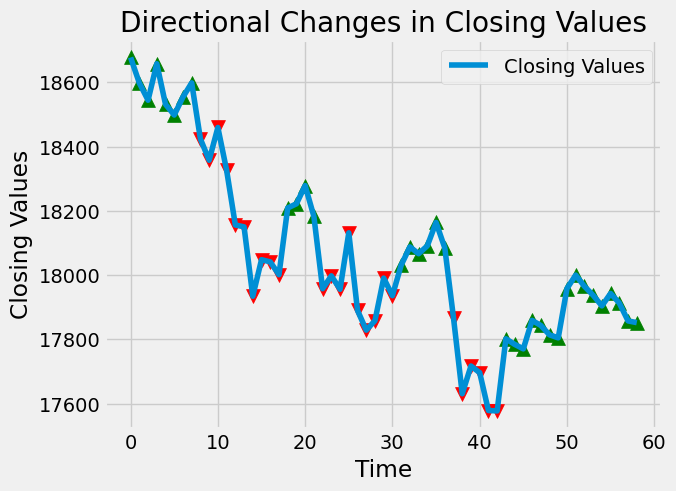

In [187]:
# Use the previously defined function to generate events and times
# events, times = generate_directional_changes(closing_values, threshold_percentage)

# Plot the closing values
plt.plot(range(len(closing_values)), closing_values, label='Closing Values')

# Highlight the events on the plot
for event, time in zip(events, times):
    if event == 'Upturn':
        plt.scatter(time, closing_values[time], color='green', marker='^',s=100)
    else:
        plt.scatter(time, closing_values[time], color='red', marker='v',s=100)

plt.xlabel('Time')
plt.ylabel('Closing Values')
plt.title('Directional Changes in Closing Values')
plt.legend()
plt.show()



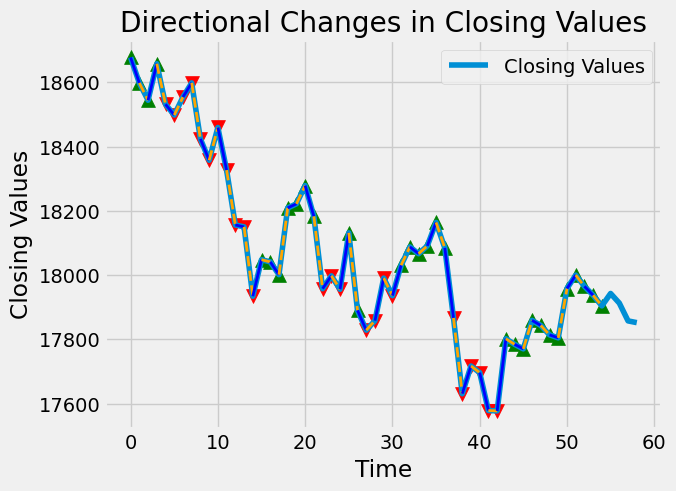

In [180]:
# Use the previously defined function to generate events and times
# events, times = generate_directional_changes(closing_values, threshold_percentage)

# Plot the closing values
plt.plot(range(len(closing_values)), closing_values, label='Closing Values')

# Highlight the events on the plot
for event, time in zip(events, times):
    if event == 'Upturn':
        plt.scatter(time, closing_values[time], color='green', marker='^',s=100)
    else:
        plt.scatter(time, closing_values[time], color='red', marker='v',s=100)
        
for i in range(0, len(times) - 1, 2):
    # Plot solid lines for DC events with endpoints on DCE and DCC points
    plt.plot([times[i], times[i+1]], [closing_values[times[i]], closing_values[times[i+1]]], linestyle='-', color='blue', linewidth=2)

    # Plot dashed lines for OS events with endpoints on DCE and DCC points
    if i < len(times) - 2:
        plt.plot([times[i+1], times[i+2]], [closing_values[times[i+1]], closing_values[times[i+2]]], linestyle='--', color='orange', linewidth=2)

# for i in range(1, len(Event)):
#     if Event[i] != Event[i-1]:
#         plt.scatter(dcc_points, [closing_values[i] for i in dcc_points], color='purple', marker='o', s=50, label='DCC Points')
    
plt.xlabel('Time')
plt.ylabel('Closing Values')
plt.title('Directional Changes in Closing Values')
plt.legend()
plt.show()



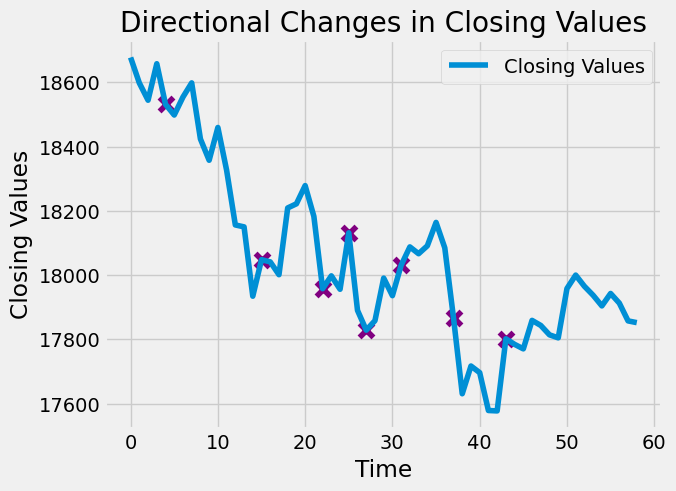

In [183]:
import matplotlib.pyplot as plt

# Plot the closing values
plt.plot(range(len(closing_values)), closing_values, label='Closing Values')

# Highlight the events on the plot
for i in range(1, len(events)):
    if events[i] != events[i-1]:
        marker_color = 'purple' 
        marker_shape = 'x' 
        plt.scatter(times[i], closing_values[times[i]], color=marker_color, marker=marker_shape, s=100)

plt.xlabel('Time')
plt.ylabel('Closing Values')
plt.title('Directional Change confirmation in Closing Values')
plt.legend()
plt.show()
